# 1) Importamos librerías

Cargamos las herramientas necesarias para análisis de datos, visualización y machine learning.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats

## Carga de Datos

Monta Google Drive y lee el archivo CSV

In [ ]:
from google.colab import drive #cargamos desde la nube la base de datos
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/tp2/student_exam_scores.csv")
#df.sample(5)
df.describe() #mostramos descripción
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
5,S006,8.4,5.1,58.5,75,35.7
6,S007,10.8,6.0,54.2,88,37.9
7,S008,2.0,4.3,75.8,55,18.3
8,S009,5.6,5.9,81.6,84,34.7
9,S010,1.3,8.9,66.8,70,24.7


## Visualizacion de datos

Creamos 4 gráficos de dispersión mostrando la relación entre cada variable (horas de estudio, sueño, asistencia, calificaciones previas) y la calificación del examen, con líneas de regresión. Así podemos ver con que variables trabajar

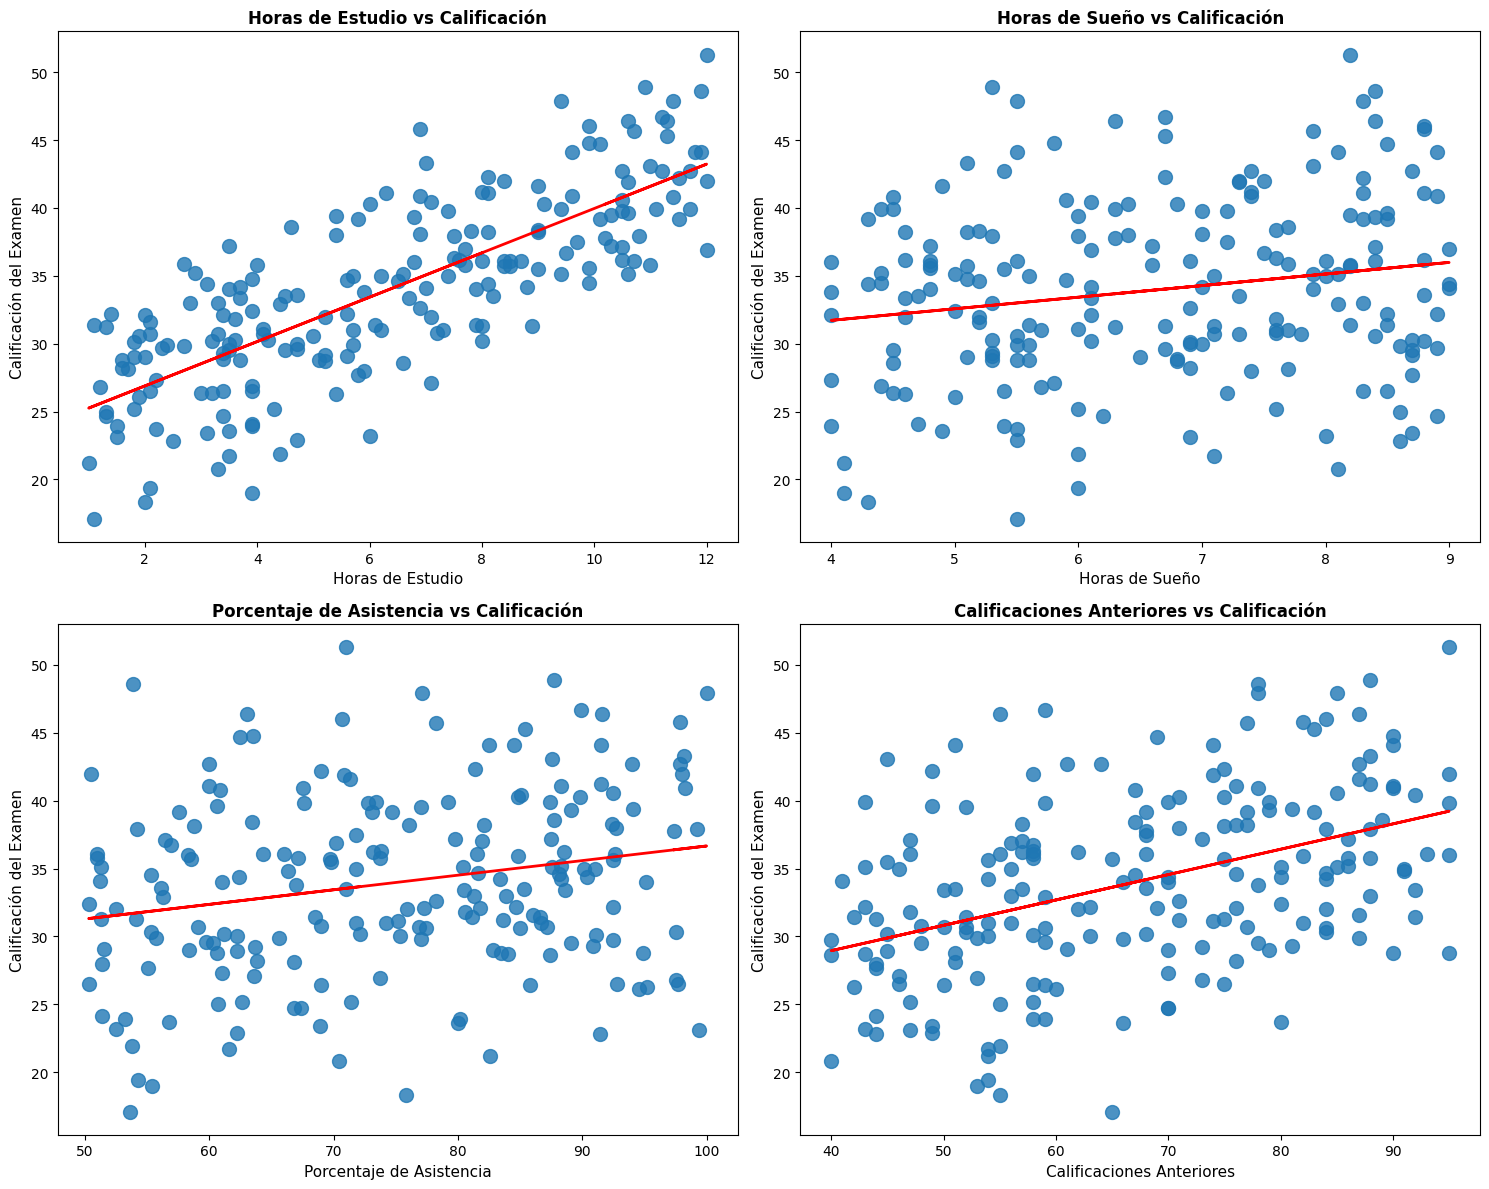

In [29]:
#creamos los cuatro gráficos
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

#definimos variables
variables = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
titulos = ['Horas de Estudio', 'Horas de Sueño', 'Porcentaje de Asistencia', 'Calificaciones Anteriores']

for idx, (var, titulo) in enumerate(zip(variables, titulos)): #creamos un bucle (for) con un contador y hacemos "encajar" cada variable con su titulo (zip)
    row = idx // 2 #posicionamos los gráficos
    col = idx % 2

    # ingresamos los Datos
    x = df[var]
    y = df['exam_score']

    # Dibujamos los puntos (datos reales)
    ax[row, col].scatter(x, y, alpha=0.8, s=100) #puntos
    ax[row, col].set_xlabel(titulo, fontsize=11)
    ax[row, col].set_ylabel('Calificación del Examen', fontsize=11)
    ax[row, col].set_title(f'{titulo} vs Calificación', fontsize=12, fontweight='bold')

    # Creamos la Línea de Regresión
    m, b = np.polyfit(x, y, 1)  #m=pendiente,  b=ord. al origen, 1=polinomio de grado 1 (recta)
    ax[row, col].plot(x, m*x + b, color='red', linewidth=2) #aplicamos la formula de la línea

plt.tight_layout()
plt.show()

# 2)Cambio de estructura y datos matriciales

Separamos las variables independientes (X) de la dependiente (y) y las convierte en arrays de NumPy.

In [30]:
#separmos las variables predictoras (X) de la variable objetivo (Y).
X = df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']].values #variables independientes
y = df['exam_score'].values #variable dependiente

print('X: ', X)
print('y:', y)

X:  [[  8.    8.8  72.1  45. ]
 [  1.3   8.6  60.7  55. ]
 [  4.    8.2  73.7  86. ]
 [  3.5   4.8  95.1  66. ]
 [  9.1   6.4  89.8  71. ]
 [  8.4   5.1  58.5  75. ]
 [ 10.8   6.   54.2  88. ]
 [  2.    4.3  75.8  55. ]
 [  5.6   5.9  81.6  84. ]
 [  1.3   8.9  66.8  70. ]
 [  3.4   5.3  90.9  81. ]
 [  6.6   7.9  87.6  85. ]
 [  1.3   6.3  83.6  71. ]
 [  3.2   6.1  61.2  68. ]
 [  8.1   8.8  60.   90. ]
 [  7.    9.   51.2  41. ]
 [  3.4   6.8  62.2  45. ]
 [  7.5   7.6  73.8  58. ]
 [  9.9   4.8  92.5  54. ]
 [  1.1   5.5  53.6  65. ]
 [  9.9   8.8  70.7  84. ]
 [  8.7   6.9  81.5  55. ]
 [  4.7   6.7  59.7  59. ]
 [  2.7   7.7  84.8  82. ]
 [ 11.5   4.3  74.7  77. ]
 [  4.7   6.9  62.2  63. ]
 [  2.    6.5  82.8  70. ]
 [  2.1   8.3  50.3  75. ]
 [ 10.3   4.8  87.5  73. ]
 [  7.6   8.8  88.5  62. ]
 [  9.9   4.4  55.3  67. ]
 [  9.    4.9  71.3  87. ]
 [  6.9   7.   58.8  75. ]
 [ 11.7   7.4  97.9  61. ]
 [  5.2   5.2  75.9  62. ]
 [  7.1   4.6  52.5  84. ]
 [ 10.1   8.5  62.5  69.

# 3) Particionado de Datos en Entrenamiento y Test

Separamos 80% para entrenamiento y 20% para prueba.

In [31]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state hace que la aleatoriedad sea la misma cada vez

# Veamos cuántos datos hay en cada grupo
print(f"Datos de entrenamiento: {X_train.shape[0]} estudiantes")
print(f"Datos de prueba: {X_test.shape[0]} estudiantes")

Datos de entrenamiento: 160 estudiantes
Datos de prueba: 40 estudiantes


## 4) Modelo con Datos de Entrenamiento

Creamos y entrenamos el modelo de regresión lineal con los datos de entrenamiento.

In [32]:
# Aprendizaje de Datos
#reg = linear_model.LinearRegression()
#reg.fit(X_train, Y_train)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("\nModelo entrenado con datos de entrenamiento.")
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Modelo entrenado con datos de entrenamiento.
Coeficientes: [1.54934126 0.88415643 0.10894946 0.18303355]
Intercepto: -2.2049639058368626


Entrenamos el modelo

In [40]:

# Creamos un objeto de la clase LinearRegression
reg_mul = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul.fit(X, y)

LinearRegression()

#5) Evaluación de modelo con datos de Entrenamiento

Calculamos métricas (MAE, MSE, R²) para medir qué tan bien predice el modelo tanto en datos de entrenamiento como de prueba.

Acá el modelo hace predicciones sobre los mismos datos con los que aprendió. "Es como si un estudiante resuelve los mismos ejercicios que estudió".

In [41]:
y_pred_train = modelo.predict(X_train)

print("\nEvaluación en datos de ENTRENAMIENTO:")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R2:", r2_score(y_train, y_pred_train))


Evaluación en datos de ENTRENAMIENTO:
MAE: 2.2885816632317946
MSE: 7.199228095614167
R2: 0.83642950148381


## 6) Evaluación del test

Ahora el modelo hace predicciones sobre datos que NUNCA vio antes. "Es como un examen real para el estudiante".
Podemos ver una leve mejora en el porcentaje de predicción (R2)

In [42]:
y_pred_test = modelo.predict(X_test)

print("\nEvaluación en datos de TEST:")
print("MAE:", mean_absolute_error(y_test, y_pred_test))  # AGREGADO
print("MSE:", mean_squared_error(y_test, y_pred_test))  # AGREGADO
print("R2:", r2_score(y_test, y_pred_test))


Evaluación en datos de TEST:
MAE: 2.310858235895833
MSE: 7.761782668623084
R2: 0.8537447137159515
